In [1]:
import pandas as pd
import numpy as np
import random as rnd
import collections
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
import statsmodels.formula.api as sm
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

## Import the Data 

In [2]:
Accident = pd.read_csv('/Users/floraattyasse/Desktop/Accident/Acc.csv','rb',delimiter=',',error_bad_lines=False,low_memory=False)
Casualties = pd.read_csv('/Users/floraattyasse/Desktop/Accident/Cas.csv','rb',delimiter=',',error_bad_lines=False,low_memory=False)
Vehicles = pd.read_csv('/Users/floraattyasse/Desktop/Accident/Veh.csv','rb',delimiter=',',error_bad_lines=False,low_memory=False)


In [3]:
Accident.shape,Casualties.shape,Vehicles.shape

((129982, 32), (170993, 16), (238926, 23))

Drop useless columns for each Dataset

In [4]:
# suppression des colonnes inutile : 
Accident.drop(['Carriageway_Hazards','Location_Easting_OSGR','Location_Northing_OSGR','Police_Force','Local_Authority_(District)','Local_Authority_(Highway)', '2nd_Road_Class', '2nd_Road_Number', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','LSOA_of_Accident_Location','Special_Conditions_at_Site','1st_Road_Number'], inplace = True, axis=1)
Casualties.drop(['Vehicle_Reference','Casualty_Reference','Age_of_Casualty','Pedestrian_Movement','Bus_or_Coach_Passenger', 'Pedestrian_Road_Maintenance_Worker', 'Casualty_Home_Area_Type','Casualty_IMD_Decile','Car_Passenger','Pedestrian_Location'], inplace = True, axis=1)
Vehicles.drop(['Hit_Object_in_Carriageway','Hit_Object_off_Carriageway','Vehicle_Reference','Towing_and_Articulation','Vehicle_Location-Restricted_Lane','Junction_Location','Skidding_and_Overturning', 'Vehicle_Leaving_Carriageway', 'Age_of_Driver','Propulsion_Code','Driver_IMD_Decile', 'Driver_Home_Area_Type','Was_Vehicle_Left_Hand_Drive?','Vehicle_IMD_Decile','Journey_Purpose_of_Driver','Age_of_Vehicle'], inplace = True, axis=1)

In [5]:
Vehicles.shape, Accident.shape, Casualties.shape

((238926, 7), (129982, 18), (170993, 6))

Copy of each Dataset

In [6]:
Accident1=Accident.copy()
Vehicles1=Vehicles.copy()
Casualties1=Casualties.copy()

In [7]:
Accident1.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
0,2017010001708,-0.080107,51.650061,1,2,3,05/08/2017,7,03:12,3,6,30,0,-1,4,1,1,1
1,2017010009342,-0.173845,51.522425,3,2,1,01/01/2017,1,01:30,3,6,30,3,4,4,1,2,1
2,2017010009344,-0.052969,51.514096,3,3,1,01/01/2017,1,00:30,3,6,30,3,4,4,1,1,1
3,2017010009348,-0.060658,51.624832,3,2,1,01/01/2017,1,01:11,3,1,30,1,4,4,2,2,1
4,2017010009350,-0.072372,51.573408,2,1,1,01/01/2017,1,01:42,3,3,20,6,2,4,1,2,1


### NaN Vehicles

In [8]:
for i in range(Vehicles1.shape[1]):
    Vehicles1.iloc[:,i][Vehicles1.iloc[:,i]== -1]=np.nan
pd.isnull(Vehicles1).sum()

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Accident_Index              0
Vehicle_Type              293
Vehicle_Manoeuvre        3957
1st_Point_of_Impact      3961
Sex_of_Driver               3
Age_Band_of_Driver      27774
Engine_Capacity_(CC)    53381
dtype: int64

### NaN Accident

In [9]:
for i in range(Accident1.shape[1]):
    Accident1.iloc[:,i][Accident1.iloc[:,i]== -1]=np.nan
pd.isnull(Accident1).sum()

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Accident_Index                 0
Longitude                     29
Latitude                      29
Accident_Severity              0
Number_of_Vehicles             0
Number_of_Casualties           0
Date                           0
Day_of_Week                    0
Time                           3
1st_Road_Class                 0
Road_Type                      0
Speed_limit                    0
Junction_Detail              609
Junction_Control           56296
Light_Conditions               1
Weather_Conditions             1
Road_Surface_Conditions     1937
Urban_or_Rural_Area            0
dtype: int64

### NaN Casualties

In [10]:
for i in range(Casualties1.shape[1]):
    Casualties1.iloc[:,i][Casualties1.iloc[:,i]== -1]=np.nan
pd.isnull(Casualties1).sum()

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Accident_Index             0
Casualty_Class             0
Sex_of_Casualty           27
Age_Band_of_Casualty    2214
Casualty_Severity          0
Casualty_Type              3
dtype: int64

# MISSING VALUE 

## Deal with MV on Accident 

In [11]:
# Correlation Matrice for Accident1
Accident1.corr()

,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
Longitude,1.000000,-0.450497,0.030807,0.002942,-0.033973,0.001809,-0.011199,-0.011040,-0.091562,0.035195,-0.052772,0.011359,0.013001,-0.066695,-0.108851
Latitude,-0.450497,1.000000,-0.037036,-0.013385,0.025229,0.001780,0.011989,0.015843,0.072680,-0.032606,0.022029,0.000373,-0.001463,0.062032,0.043852
Accident_Severity,0.030807,-0.037036,1.000000,0.070537,-0.064203,0.004874,0.012435,-0.034854,-0.084999,0.041699,-0.036013,-0.047763,0.027329,0.001582,-0.088216
Number_of_Vehicles,0.002942,-0.013385,0.070537,1.000000,0.230437,0.001799,-0.134439,-0.078128,0.116069,0.030424,0.030234,-0.058077,-0.044562,-0.050295,0.061742
Number_of_Casualties,-0.033973,0.025229,-0.064203,0.230437,1.000000,-0.004614,-0.091666,-0.019528,0.168135,-0.013588,-0.017159,0.030328,-0.028235,0.019018,0.134392
Day_of_Week,0.001809,0.001780,0.004874,0.001799,-0.004614,1.000000,0.006166,0.003267,-0.019189,0.009554,-0.003281,0.004704,-0.000749,-0.004497,-0.019556
1st_Road_Class,-0.011199,0.011989,0.012435,-0.134439,-0.091666,0.006166,1.000000,0.280135,-0.367660,0.020660,0.206697,-0.036023,0.016807,0.003425,-0.204966
Road_Type,-0.011040,0.015843,-0.034854,-0.078128,-0.019528,0.003267,0.280135,1.000000,-0.180619,0.100080,0.076867,-0.008205,0.069692,0.011376,-0.038801
Speed_limit,-0.091562,0.072680,-0.084999,0.116069,0.168135,-0.019189,-0.367660,-0.180619,1.000000,-0.230174,0.098844,0.076109,-0.023390,0.106521,0.674813
Junction_Detail,0.035195,-0.032606,0.041699,0.030424,-0.013588,0.009554,0.020660,0.100080,-0.230174,1.000000,-0.181261,-0.032750,-0.009439,-0.047089,-0.220055


In [12]:
pd.isnull(Accident1).sum()

Accident_Index                 0
Longitude                     29
Latitude                      29
Accident_Severity              0
Number_of_Vehicles             0
Number_of_Casualties           0
Date                           0
Day_of_Week                    0
Time                           3
1st_Road_Class                 0
Road_Type                      0
Speed_limit                    0
Junction_Detail              609
Junction_Control           56296
Light_Conditions               1
Weather_Conditions             1
Road_Surface_Conditions     1937
Urban_or_Rural_Area            0
dtype: int64

#### Too many missing values in Junction_control. Junction_Detail = 0 correspond to the Junction_control's Missing values

In [13]:
Accident1[Accident1['Junction_Control'].isnull()].head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
0,2017010001708,-0.080107,51.650061,1,2,3,05/08/2017,7,03:12,3,6,30,0.0,NaN,4.0,1.0,1.0,1
5,2017010009351,-0.353876,51.438762,3,2,1,01/01/2017,1,03:31,6,6,30,0.0,NaN,4.0,1.0,2.0,1
7,2017010009354,-0.158150,51.522000,3,2,1,01/01/2017,1,05:20,3,3,30,0.0,NaN,4.0,2.0,2.0,1
11,2017010009362,-0.367663,51.548392,3,1,1,01/01/2017,1,06:55,3,6,30,0.0,NaN,4.0,1.0,2.0,1
13,2017010009364,-0.124965,51.529748,2,2,1,01/01/2017,1,08:15,3,3,30,0.0,NaN,1.0,2.0,2.0,1


In [14]:
Accident1['Junction_Detail'].value_counts()

0.0    54278
3.0    38902
6.0    12352
1.0    10751
9.0     4710
8.0     3264
5.0     2048
7.0     1567
2.0     1501
Name: Junction_Detail, dtype: int64

In [15]:
Accident1['Junction_Control'].loc[Accident1['Junction_Detail'] == 0] = 0

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


We drop the others missing values

In [16]:
Accident1=Accident1.dropna(subset=['Junction_Control']) 

In [17]:
pd.isnull(Accident1).sum()

Accident_Index                0
Longitude                    28
Latitude                     28
Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Date                          0
Day_of_Week                   0
Time                          3
1st_Road_Class                0
Road_Type                     0
Speed_limit                   0
Junction_Detail              46
Junction_Control              0
Light_Conditions              1
Weather_Conditions            1
Road_Surface_Conditions    1129
Urban_or_Rural_Area           0
dtype: int64

#### Longitude & Latitude 

In [18]:
Accident1=Accident1.dropna(subset=['Longitude']) 
pd.isnull(Accident1['Longitude']).sum()

0

In [19]:
Accident1.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
0,2017010001708,-0.080107,51.650061,1,2,3,05/08/2017,7,03:12,3,6,30,0.0,0.0,4.0,1.0,1.0,1
1,2017010009342,-0.173845,51.522425,3,2,1,01/01/2017,1,01:30,3,6,30,3.0,4.0,4.0,1.0,2.0,1
2,2017010009344,-0.052969,51.514096,3,3,1,01/01/2017,1,00:30,3,6,30,3.0,4.0,4.0,1.0,1.0,1
3,2017010009348,-0.060658,51.624832,3,2,1,01/01/2017,1,01:11,3,1,30,1.0,4.0,4.0,2.0,2.0,1
4,2017010009350,-0.072372,51.573408,2,1,1,01/01/2017,1,01:42,3,3,20,6.0,2.0,4.0,1.0,2.0,1


#### TIME : drop the raws with  missing values

In [20]:
## TIME ## 
Accident1=Accident1.dropna(subset=['Time']) 
pd.isnull(Accident1['Time']).sum()

0

We only keep hours to discretize 

In [21]:
Accident1['Time']=Accident1['Time'].str.split(":",expand=True)[0]
Accident1['Time'] = Accident1['Time'].astype(np.int64)

Discretize Time(h): [6,12)=0, [12,18)=1, [18,22)=2, [22,6)=3


0 from 6 to noon, 1 from noon to 18, 2 from 18 to 22, 3 from 22 to 6

In [22]:
Accident1['Time'] = ['0' if element >=6 and element <12 else '1' if element >=12 and element <18 else '2' if element >=18 and element <22 else '3' for element in Accident1['Time']]
#we discretize : 0 from 6 to noon, 1 from noon to 18, 2 from 18 to 22, 3 from 22 to 6

In [23]:
Accident1.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
0,2017010001708,-0.080107,51.650061,1,2,3,05/08/2017,7,3,3,6,30,0.0,0.0,4.0,1.0,1.0,1
1,2017010009342,-0.173845,51.522425,3,2,1,01/01/2017,1,3,3,6,30,3.0,4.0,4.0,1.0,2.0,1
2,2017010009344,-0.052969,51.514096,3,3,1,01/01/2017,1,3,3,6,30,3.0,4.0,4.0,1.0,1.0,1
3,2017010009348,-0.060658,51.624832,3,2,1,01/01/2017,1,3,3,1,30,1.0,4.0,4.0,2.0,2.0,1
4,2017010009350,-0.072372,51.573408,2,1,1,01/01/2017,1,3,3,3,20,6.0,2.0,4.0,1.0,2.0,1


#### Junction_Control, drop the rows with missing values

In [24]:
Accident1=Accident1.dropna(subset=['Junction_Control'])
pd.isnull(Accident1['Junction_Control']).sum()

0

#### Light_Condtions, only 1 missing value same as Weather_conditions so we drop it

In [25]:
Accident1=Accident1.dropna(subset=['Light_Conditions'])

#### Junction_Detail: Decision Tree

In [26]:
pd.isnull(Accident1).sum()

Accident_Index                0
Longitude                     0
Latitude                      0
Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Date                          0
Day_of_Week                   0
Time                          0
1st_Road_Class                0
Road_Type                     0
Speed_limit                   0
Junction_Detail              46
Junction_Control              0
Light_Conditions              0
Weather_Conditions            0
Road_Surface_Conditions    1126
Urban_or_Rural_Area           0
dtype: int64

In [27]:
Accident1bis=Accident1.copy()
Accident1bis.drop(['Date','Accident_Index','Road_Surface_Conditions'], inplace = True, axis=1)

In [28]:
#we keep all instances having missing values and we drop 'Junction_Detail'
Accident3=Accident1bis[Accident1bis['Junction_Detail'].isnull()]
Accident3 = Accident3.drop(['Junction_Detail'],axis=1) 

In [29]:
Accident2=Accident1bis.dropna(subset=['Junction_Detail'])
y=Accident2['Junction_Detail'] #only keep non null Junction_Detail

In [30]:
Accident2=Accident2.drop(['Junction_Detail'],axis=1)
Accident2.shape,y.shape,Accident3.shape

((127867, 14), (127867,), (46, 14))

In [31]:
X_training,X_validation,Y_training,Y_validation = train_test_split(Accident2,y, test_size = 0.2, random_state = 21)

clf = DecisionTreeClassifier(max_depth=13)
clf.fit(X_training,Y_training)
y_pred = clf.predict(X_validation)

y_pred = y_pred.tolist()
acc_DecTree = round(accuracy_score(y_pred, Y_validation) * 100, 2)
print(acc_DecTree)

79.32


Accuracy of the decision Tree > 75% we can use it 

In [32]:
clf = DecisionTreeClassifier(max_depth=13)
clf.fit(Accident2,y )

y_pred = clf.predict(Accident3)

y_pred = y_pred.tolist()

for x in y_pred:
    Accident1['Junction_Detail'] = Accident1bis['Junction_Detail'].fillna(x)


#### Weather_Conditions ( 9 is MV)  &  Road_Surface_Conditions MV are linked with weather, we drop the rows with MV for Road then for the other we make a Decision Tree

In [33]:
Accident1['Weather_Conditions'].value_counts()

1.0    103668
2.0     14139
9.0      3823
8.0      2611
4.0      1226
5.0      1099
3.0       631
7.0       617
6.0        99
Name: Weather_Conditions, dtype: int64

In [34]:
Accident1['Weather_Conditions'].loc[Accident1['Weather_Conditions'] == 9] = np.nan
pd.isnull(Accident1['Weather_Conditions']).sum()

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


3823

In [35]:
Accident1=Accident1.dropna(subset=['Road_Surface_Conditions'])
pd.isnull(Accident1['Road_Surface_Conditions']).sum()

0

In [36]:
pd.isnull(Accident1['Weather_Conditions']).sum()

2973

We delete the rows with MV for Road_Surface_Conditions because there were MV for both (Weather et Road), then we can make a decision tree for Weather

Then we make the Decision Tree

In [37]:
Accident1bis=Accident1.copy()
Accident1bis.drop(['Date','Accident_Index','Road_Surface_Conditions'], inplace = True, axis=1)
Accident3=Accident1bis[Accident1bis['Weather_Conditions'].isnull()] 
Accident3 = Accident3.drop(['Weather_Conditions'],axis=1) 


In [38]:
Accident2=Accident1bis.dropna(subset=['Weather_Conditions'])
y=Accident2['Weather_Conditions']
Accident2=Accident2.drop(['Weather_Conditions'],axis=1)

In [39]:
X_training,X_validation,Y_training,Y_validation = train_test_split(Accident2,y, test_size = 0.2, random_state = 21)

clf = DecisionTreeClassifier(max_depth=13)
clf.fit(X_training,Y_training)
y_pred = clf.predict(X_validation)

y_pred = y_pred.tolist()
acc_DecTree = round(accuracy_score(y_pred, Y_validation) * 100, 2)
print(acc_DecTree)

81.87


Accuracy > 75% we can use the decision tree

In [40]:
clf = DecisionTreeClassifier(max_depth=13)
clf.fit(Accident2,y )

y_pred = clf.predict(Accident3)

y_pred = y_pred.tolist()

for x in y_pred:
    Accident1['Weather_Conditions'] = Accident1['Weather_Conditions'].fillna(x)

pd.isnull(Accident1['Weather_Conditions']).sum()

0

#### Light_Conditions : 7 is MV, we use the mode() according to Time, Urban_or_Rural_Area and Road_Type

In [41]:
Accident1['Light_Conditions'][Accident1['Light_Conditions']== 7]=np.nan

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


We make the decision tree

In [42]:
Accident1bis=Accident1.copy()
Accident1bis.drop(['Date','Accident_Index'], inplace = True, axis=1)

In [43]:
Accident3=Accident1bis[Accident1bis['Light_Conditions'].isnull()] 
Accident3 = Accident3.drop(['Light_Conditions'],axis=1)

In [44]:
Accident2=Accident1bis.dropna(subset=['Light_Conditions'])
y=Accident2['Light_Conditions']
Accident2=Accident2.drop(['Light_Conditions'],axis=1)

In [45]:
X_training,X_validation,Y_training,Y_validation = train_test_split(Accident2,y, test_size = 0.2, random_state = 21)

clf = DecisionTreeClassifier(max_depth=13)
clf.fit(X_training,Y_training)
y_pred = clf.predict(X_validation)

y_pred = y_pred.tolist()
acc_DecTree = round(accuracy_score(y_pred, Y_validation) * 100, 2)
print(acc_DecTree)

82.91


Accuracy > 75%, we can use the decision tree

In [46]:
clf = DecisionTreeClassifier(max_depth=13)
clf.fit(Accident2,y )

y_pred = clf.predict(Accident3)

y_pred = y_pred.tolist()

for x in y_pred:
    Accident1['Light_Conditions'] = Accident1['Light_Conditions'].fillna(x)

In [47]:
pd.isnull(Accident1).sum()

Accident_Index             0
Longitude                  0
Latitude                   0
Accident_Severity          0
Number_of_Vehicles         0
Number_of_Casualties       0
Date                       0
Day_of_Week                0
Time                       0
1st_Road_Class             0
Road_Type                  0
Speed_limit                0
Junction_Detail            0
Junction_Control           0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
dtype: int64

#### Road_Type 9 is Missing Value
For the MV : mode() according to Junction_Detail and Urban_or_Rural_Area 

In [48]:
Accident1['Road_Type'].value_counts()
Accident1['Road_Type'].loc[Accident1['Road_Type'] == 9] = np.nan
pd.isnull(Accident1['Road_Type']).sum()

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1378

In [49]:
Accident1['Road_Type'] = Accident1.groupby(['Junction_Detail','Urban_or_Rural_Area'])['Road_Type'].transform(lambda x: x.fillna(x.mode()[0]))
pd.isnull(Accident1['Road_Type']).sum()

0

#### Urban_or_Rural_Area : 3 is MV, but only 1 missing value  

In [50]:
Accident1['Urban_or_Rural_Area'].loc[Accident1['Urban_or_Rural_Area'] == 3] = np.nan
pd.isnull(Accident1['Urban_or_Rural_Area']).sum()

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1

In [51]:
Accident1[pd.isnull(Accident1['Urban_or_Rural_Area'])]


,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
44302,2017120117754,-1.300889,53.774089,2,1,1,05/07/2017,4,2,3,3.0,70,5.0,4.0,1.0,1.0,1.0,NaN


It's on Slip Road, Motorway A so it's Urban. then = 1

In [52]:
Accident1['Urban_or_Rural_Area'][pd.isnull(Accident1['Urban_or_Rural_Area'])]=1


/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Deal with MV on Casualties 

In [53]:
Casualties1.corr()

,Casualty_Class,Sex_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Casualty_Type
Casualty_Class,1.000000,0.146934,-0.161932,-0.061784,-0.235022
Sex_of_Casualty,0.146934,1.000000,0.039586,0.091145,0.029060
Age_Band_of_Casualty,-0.161932,0.039586,1.000000,-0.063979,0.062900
Casualty_Severity,-0.061784,0.091145,-0.063979,1.000000,0.070532
Casualty_Type,-0.235022,0.029060,0.062900,0.070532,1.000000


In [54]:
pd.isnull(Casualties1).sum(),Casualties.shape

(Accident_Index             0
 Casualty_Class             0
 Sex_of_Casualty           27
 Age_Band_of_Casualty    2214
 Casualty_Severity          0
 Casualty_Type              3
 dtype: int64, (170993, 6))

In [55]:
Casualties1.head()

,Accident_Index,Casualty_Class,Sex_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Casualty_Type
0,2017010001708,2,2.0,4.0,3,9.0
1,2017010001708,1,1.0,4.0,2,2.0
2,2017010001708,2,1.0,4.0,1,2.0
3,2017010009342,2,2.0,6.0,3,9.0
4,2017010009344,1,2.0,6.0,3,9.0


#### Sex_of_Casualty
We drop missing value 

In [56]:
Casualties1=Casualties1.dropna(subset=['Sex_of_Casualty'])
pd.isnull(Casualties1['Sex_of_Casualty']).sum()

0

#### Casualty_Type
Only 3 missing values, we decided to drop it

In [57]:
Casualties1=Casualties1.dropna(subset=['Casualty_Type'])
pd.isnull(Casualties1['Casualty_Type']).sum()

0

#### Age_Band_of_Casualty
Only 1.2% of the data are missing value, so we can drop it 

In [58]:
Casualties1=Casualties1.dropna(subset=['Age_Band_of_Casualty'])
pd.isnull(Casualties1['Age_Band_of_Casualty']).sum()

0

## Deal with MV on Vehicles 

In [59]:
# Correlation Matrice for Vehicles1
Vehicles1.corr()

,Vehicle_Type,Vehicle_Manoeuvre,1st_Point_of_Impact,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC)
Vehicle_Type,1.000000,-0.046372,-0.007929,0.033943,0.066976,0.402674
Vehicle_Manoeuvre,-0.046372,1.000000,-0.074332,-0.116222,-0.063975,-0.029810
1st_Point_of_Impact,-0.007929,-0.074332,1.000000,-0.002690,0.022522,-0.024152
Sex_of_Driver,0.033943,-0.116222,-0.002690,1.000000,0.003091,-0.098567
Age_Band_of_Driver,0.066976,-0.063975,0.022522,0.003091,1.000000,0.125711
Engine_Capacity_(CC),0.402674,-0.029810,-0.024152,-0.098567,0.125711,1.000000


In [60]:
Vehicles1.head()

,Accident_Index,Vehicle_Type,Vehicle_Manoeuvre,1st_Point_of_Impact,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC)
0,2017010001708,9.0,18.0,1.0,1.0,5.0,1997.0
1,2017010001708,2.0,18.0,2.0,1.0,4.0,NaN
2,2017010009342,9.0,18.0,2.0,1.0,6.0,1797.0
3,2017010009342,9.0,18.0,1.0,1.0,7.0,2204.0
4,2017010009344,9.0,18.0,1.0,3.0,NaN,NaN


In [61]:
pd.isnull(Vehicles1).sum()

Accident_Index              0
Vehicle_Type              293
Vehicle_Manoeuvre        3957
1st_Point_of_Impact      3961
Sex_of_Driver               3
Age_Band_of_Driver      27774
Engine_Capacity_(CC)    53381
dtype: int64

#### Sex_of_Driver :

In [62]:
Vehicles1['Sex_of_Driver'].value_counts()

1.0    153964
2.0     65127
3.0     19832
Name: Sex_of_Driver, dtype: int64

For Sex_of_Driver, we will make the decision tree after the merging

In [63]:
Vehicles1['Sex_of_Driver'].fillna(3, inplace=True)
Vehicles1['Sex_of_Driver'].value_counts()

1.0    153964
2.0     65127
3.0     19835
Name: Sex_of_Driver, dtype: int64

#### 1st_Point_of_Impact
Same missing value for 1st_Point_of_Impact and Vehicle_Manoeuvre, impossible to predict theim so we drop it 

In [64]:
Vehicles1[pd.isnull(Vehicles1['1st_Point_of_Impact'])].head()

,Accident_Index,Vehicle_Type,Vehicle_Manoeuvre,1st_Point_of_Impact,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC)
317,2017010009840,19.0,NaN,NaN,1.0,NaN,1560.0
804,2017010010667,1.0,18.0,NaN,1.0,6.0,NaN
805,2017010010668,9.0,NaN,NaN,1.0,7.0,2143.0
806,2017010010668,1.0,NaN,NaN,2.0,7.0,NaN
852,2017010010795,9.0,9.0,NaN,1.0,6.0,1598.0


In [65]:
Vehicles1=Vehicles1.dropna(subset=['1st_Point_of_Impact'])
pd.isnull(Vehicles1['1st_Point_of_Impact']).sum()

0

In [66]:
pd.isnull(Vehicles1['Vehicle_Manoeuvre']).sum()

1362

#### Vehicle_Manoeuvre : we have 903 missing values, we make a mode() according to the 1st_Point_of_Impact

In [67]:
Vehicles1['Vehicle_Manoeuvre'] = Vehicles1.groupby(['1st_Point_of_Impact'])['Vehicle_Manoeuvre'].transform(lambda x: x.fillna(x.mode()[0]))
pd.isnull(Vehicles1['Vehicle_Manoeuvre']).sum()

0

#### Age_Band_of_Driver  : we decided to drop it

In [68]:
Vehicles1=Vehicles1.dropna(subset=['Age_Band_of_Driver'])
pd.isnull(Vehicles1['Age_Band_of_Driver']).sum()

0

#### Vehicle_Type MV  only 24 missing values, we drop it

In [69]:
pd.isnull(Vehicles1).sum()

Accident_Index              0
Vehicle_Type               24
Vehicle_Manoeuvre           0
1st_Point_of_Impact         0
Sex_of_Driver               0
Age_Band_of_Driver          0
Engine_Capacity_(CC)    39107
dtype: int64

In [70]:
Vehicles1=Vehicles1.dropna(subset=['Vehicle_Type'])

#### Engine_Capacity_(CC) : 39107 MV, mode() according to the type of vehicles

We have a lot of vehicles that don't have Engine, so attribute the value 0 

In [71]:
Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 1] = 0
Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 98] = 0
Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 97] = 0
Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 22] = 0
Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 16] = 0
Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 18] = 0

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [72]:
Vehicles1.loc[Vehicles1['Engine_Capacity_(CC)'] == 0].head()

,Accident_Index,Vehicle_Type,Vehicle_Manoeuvre,1st_Point_of_Impact,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC)
17,2017010009358,1.0,18.0,0.0,1.0,6.0,0.0
158,2017010009518,1.0,18.0,0.0,2.0,7.0,0.0
163,2017010009536,1.0,9.0,1.0,1.0,5.0,0.0
177,2017010009590,1.0,18.0,2.0,1.0,6.0,0.0
182,2017010009593,1.0,9.0,1.0,1.0,9.0,0.0


In [73]:
Vehicles1['Engine_Capacity_(CC)'] = Vehicles1.groupby(['Vehicle_Type'])['Engine_Capacity_(CC)'].transform(lambda x: x.fillna(x.mode()[0]))

In [74]:
pd.isnull(Vehicles1['Engine_Capacity_(CC)']).sum()

0

In [75]:
Vehicles1['Vehicle_Type'].value_counts()

9.0     145538
1.0      17785
19.0     10534
3.0       7983
5.0       5910
8.0       4659
11.0      4491
21.0      3619
4.0       2270
2.0       1769
90.0      1206
20.0       991
98.0       818
17.0       449
10.0       389
97.0       223
22.0       207
16.0        81
23.0        52
18.0        19
Name: Vehicle_Type, dtype: int64

#### Decision Tree for Sex of Driver

In [76]:
Vehicles1Bis=Vehicles1.copy()

Vehicles1Bis['Sex_of_Driver'][Vehicles1Bis['Sex_of_Driver']== 3]=np.nan
pd.isnull(Vehicles1Bis['Sex_of_Driver']).sum()

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1773

In [77]:
Vehicles1Bis.drop(['Accident_Index','Engine_Capacity_(CC)'], inplace = True, axis=1)
Vehicles3=Vehicles1Bis[Vehicles1Bis['Sex_of_Driver'].isnull()] # data avec toute colonne et Y ,mais que ligne ou il ya les NA 
Vehicles3 = Vehicles3.drop(['Sex_of_Driver'],axis=1) 

In [78]:
Vehicles2=Vehicles1Bis.dropna(subset=['Sex_of_Driver'])
y=Vehicles2['Sex_of_Driver']

Vehicles2=Vehicles2.drop(['Sex_of_Driver'],axis=1)

Vehicles2.shape, Vehicles3.shape, y.shape


((207220, 4), (1773, 4), (207220,))

In [79]:
X_training,X_validation,Y_training,Y_validation = train_test_split(Vehicles2,y, test_size = 0.2, random_state = 21)

clf = DecisionTreeClassifier(max_depth=13)
clf.fit(X_training,Y_training)
y_pred = clf.predict(X_validation)

y_pred = y_pred.tolist()
acc_DecTree = round(accuracy_score(y_pred, Y_validation) * 100, 2)
print(acc_DecTree)

69.75


#### Accuracy < 69.87 : not accurate, we can not use it, we will try after the merging because the driver is often the victim.


# Casualties1 Data Engineering

In [80]:
Casualties1['Casualty_Type'].value_counts()

9.0     95928
0.0     23461
1.0     18017
3.0      7788
5.0      5894
19.0     4141
11.0     4043
8.0      2649
4.0      2222
2.0      1719
21.0      742
90.0      664
10.0      335
20.0      289
98.0      238
97.0      206
22.0      177
17.0      101
16.0       79
23.0       55
18.0       15
Name: Casualty_Type, dtype: int64

Categorize : 0: pedestrian, 1: car, 2: bike & horse, 3:motorcycle 4: truck, 5: bus,tram, 6: other

In [81]:
Casualties1['Casualty_Type'] = [ 0 if element == 0
                      else 3 if element == 2 or element == 3 or element == 4 or element ==5 or element == 23 or element ==97
                      else 2 if element == 1 or element ==16 or element ==22
                      else 1 if element == 8 or element ==9
                      else 4 if element == 19 or element ==20 or element == 21 or element ==98 or element ==17
                      else 5 if element == 10 or element ==11 or element ==18
                      else 6 
                      for element in Casualties1['Casualty_Type']]

Casualties1.shape 

(168763, 6)

In [82]:
Casualties1['Casualty_Type'].value_counts()

1    98577
0    23461
2    18273
3    17884
4     5511
5     4393
6      664
Name: Casualty_Type, dtype: int64

6 : Other, similar to missing value

In [83]:
Casualties1['Casualty_Type'].loc[Casualties1['Casualty_Type'] == 6] = np.nan
Casualties1=Casualties1.dropna(subset=['Casualty_Type'])
pd.isnull(Casualties1['Casualty_Type']).sum()

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

Frequency of Casualty_Severity for Casualty_Type=5

In [84]:
Casualties1['Casualty_Severity'].loc[Casualties1['Casualty_Type']==5].value_counts()

3    4076
2     302
1      15
Name: Casualty_Severity, dtype: int64

We modify the range for Age_Band_of_Casualty : 1:(0:5), 2:(6:15), 3:(16:35), 4:(36:65), 5: >66

In [85]:
Casualties1['Age_Band_of_Casualty'] = [ 1 if element ==1
           else 2 if element == 2 or element ==3 
           else 3 if element == 4 or element ==5 or element ==6
           else 4 if element == 7 or element == 8 or element ==9 
           else 5 
           for element in Casualties1['Age_Band_of_Casualty']]


Casualty_Severity : Make a binary column with : 

0 : Slight Accident

1 : Serious Accident

In [86]:
Casualties1['Casualty_Severity']=[0 if element == 3
                                 else 1
                                 for element in Casualties1['Casualty_Severity']]

In [87]:
Casualties1.Casualty_Severity.value_counts()

0    141801
1     26298
Name: Casualty_Severity, dtype: int64

## Vehicles1 Data engineering

Modify the range for Age_Band_of_Driver : 1:(0:5), 2:(6:15), 3:(16:35), 4:(36:65), 5: >66

In [88]:
Vehicles1['Age_Band_of_Driver'] = [ 1 if element ==1
           else 2 if element == 2 or element ==3
           else 3 if element == 4 or element ==5 or element ==6
           else 4 if element == 7 or element == 8 or element ==9 
           else 5 
           for element in Vehicles1['Age_Band_of_Driver']]

In [89]:
Vehicles1['Vehicle_Type'].value_counts()

9.0     145538
1.0      17785
19.0     10534
3.0       7983
5.0       5910
8.0       4659
11.0      4491
21.0      3619
4.0       2270
2.0       1769
90.0      1206
20.0       991
98.0       818
17.0       449
10.0       389
97.0       223
22.0       207
16.0        81
23.0        52
18.0        19
Name: Vehicle_Type, dtype: int64

we categorize : 1: car 2: bike & horse 3: motorcycle, 4: truck, 5: bus,tram, 6: other

In [90]:

Vehicles1['Vehicle_Type'] = [ 3 if element == 2 or element == 3 or element == 4 or element ==5 or element == 23 or element ==97
           else 2 if element == 1 or element == 16 or element == 22
           else 1 if element ==8 or element ==9
           else 4 if element == 19 or element ==17 or element ==20 or element == 21 or element ==98
           else 6 if element == 90
           else 5 
           for element in Vehicles1['Vehicle_Type']]

In [91]:
Vehicles1['Vehicle_Type'].value_counts()

1    150197
3     18207
2     18073
4     16411
5      4899
6      1206
Name: Vehicle_Type, dtype: int64

We consider Other Vehicle as missing values

In [92]:
Vehicles1['Vehicle_Type'].loc[Vehicles1['Vehicle_Type'] == 6] = np.nan
Vehicles1=Vehicles1.dropna(subset=['Vehicle_Type'])
pd.isnull(Vehicles1['Vehicle_Type']).sum()

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

#### Categorize Engine Capacity according to the vehicle_Type with the median of the Vehicle_Type

Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 1].median()*1.5= 2397

In [93]:
Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 1] = [ 1 if element > 0 and element < 2397
           else 2
           for element in Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 1]]

Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 3].median()*1.5=188

In [94]:
Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 3] = [ 1 if element > 0 and element < 188
           else 2
           for element in Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 3]]

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 4].median()*1.5 = 3297

In [95]:
Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 4] = [ 1 if element > 0 and element < 3297
           else 2
           for element in Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 4]]

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 5].median()*1.5 = 7698

In [96]:
Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 5] = [ 1 if element > 0 and element < 7698
           else 2
           for element in Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 5]]

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [97]:
Vehicles1['Engine_Capacity_(CC)'].loc[Vehicles1['Vehicle_Type'] == 5].median()*1.5

1.5

## Accident 1 Data Engineering

In [98]:
Accident1.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
0,2017010001708,-0.080107,51.650061,1,2,3,05/08/2017,7,3,3,6.0,30,0.0,0.0,4.0,1.0,1.0,1.0
1,2017010009342,-0.173845,51.522425,3,2,1,01/01/2017,1,3,3,6.0,30,3.0,4.0,4.0,1.0,2.0,1.0
2,2017010009344,-0.052969,51.514096,3,3,1,01/01/2017,1,3,3,6.0,30,3.0,4.0,4.0,1.0,1.0,1.0
3,2017010009348,-0.060658,51.624832,3,2,1,01/01/2017,1,3,3,1.0,30,1.0,4.0,4.0,2.0,2.0,1.0
4,2017010009350,-0.072372,51.573408,2,1,1,01/01/2017,1,3,3,3.0,20,6.0,2.0,4.0,1.0,2.0,1.0


Add column with the month, it will be more useful than Date

In [99]:
Accident1['Month']=Accident1['Date'].str.split("/",expand=True)[1]
Accident1[['Month','Date']].head()

,Month,Date
0,08,05/08/2017
1,01,01/01/2017
2,01,01/01/2017
3,01,01/01/2017
4,01,01/01/2017


In [100]:
Accident1.drop(['Date'],inplace=True, axis=1)

Accident_Severity : Make a binary column

0 : Slight Accident

1 : Serious Accident

In [101]:
Accident1['Accident_Severity'] = [ 0 if element == 3
            else 1
            for element in Accident1['Accident_Severity']]

In [102]:
Accident1['Accident_Severity'].value_counts()

0    102776
1     24011
Name: Accident_Severity, dtype: int64

# Merge of the 3 datasets

In [103]:
Data=pd.merge(Accident1, Casualties1, on = 'Accident_Index')
Data1=pd.merge(Data, Vehicles1, on = 'Accident_Index')

In [104]:
Accident1.shape, Casualties1.shape, Vehicles1.shape

((126787, 18), (168099, 6), (207787, 7))

In [105]:
Data1.shape

(288635, 29)

In [106]:
Data1['Casualty_Severity'].value_counts()

0    246491
1     42144
Name: Casualty_Severity, dtype: int64

In [107]:
Data1.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,1st_Road_Class,Road_Type,...,Sex_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Casualty_Type,Vehicle_Type,Vehicle_Manoeuvre,1st_Point_of_Impact,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC)
0,2017010001708,-0.080107,51.650061,1,2,3,7,3,3,6.0,...,2.0,3,0,1.0,1.0,18.0,1.0,1.0,3,1.0
1,2017010001708,-0.080107,51.650061,1,2,3,7,3,3,6.0,...,2.0,3,0,1.0,3.0,18.0,2.0,1.0,3,1.0
2,2017010001708,-0.080107,51.650061,1,2,3,7,3,3,6.0,...,1.0,3,1,3.0,1.0,18.0,1.0,1.0,3,1.0
3,2017010001708,-0.080107,51.650061,1,2,3,7,3,3,6.0,...,1.0,3,1,3.0,3.0,18.0,2.0,1.0,3,1.0
4,2017010001708,-0.080107,51.650061,1,2,3,7,3,3,6.0,...,1.0,3,1,3.0,1.0,18.0,1.0,1.0,3,1.0


In [108]:
Data1['Sex_of_Driver'][Data1['Sex_of_Driver']== 3]=np.nan
Data1Bis=Data1.copy()
Data1Bis.drop(['Month','Accident_Index','Road_Surface_Conditions','Light_Conditions'], inplace = True, axis=1)


/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
# dataset2 : we keep all instances having missing values and we drop 
Data3=Data1Bis[Data1Bis['Sex_of_Driver'].isnull()] 
Data3 = Data3.drop(['Sex_of_Driver'],axis=1) 

In [110]:
Data2=Data1Bis.dropna(subset=['Sex_of_Driver'])
y=Data2['Sex_of_Driver']
Data2=Data2.drop(['Sex_of_Driver'],axis=1)

Data2.shape, Data3.shape, y.shape

((286513, 24), (2122, 24), (286513,))

In [111]:
X_training,X_validation,Y_training,Y_validation = train_test_split(Data2,y, test_size = 0.2, random_state = 21)

clf = DecisionTreeClassifier(max_depth=13)
clf.fit(X_training,Y_training)
y_pred = clf.predict(X_validation)

y_pred = y_pred.tolist()
acc_DecTree = round(accuracy_score(y_pred, Y_validation) * 100, 2)
print(acc_DecTree)

79.49


Accuracy > 75% we can now use the decision tree 

In [112]:
clf = DecisionTreeClassifier(max_depth=13)
clf.fit(Data2,y )

y_pred = clf.predict(Data3)

y_pred = y_pred.tolist()

for x in y_pred:
    Data1['Sex_of_Driver'] = Data1['Sex_of_Driver'].fillna(x)

In [113]:
pd.isnull(Data1).sum()

Accident_Index             0
Longitude                  0
Latitude                   0
Accident_Severity          0
Number_of_Vehicles         0
Number_of_Casualties       0
Day_of_Week                0
Time                       0
1st_Road_Class             0
Road_Type                  0
Speed_limit                0
Junction_Detail            0
Junction_Control           0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Month                      0
Casualty_Class             0
Sex_of_Casualty            0
Age_Band_of_Casualty       0
Casualty_Severity          0
Casualty_Type              0
Vehicle_Type               0
Vehicle_Manoeuvre          0
1st_Point_of_Impact        0
Sex_of_Driver              0
Age_Band_of_Driver         0
Engine_Capacity_(CC)       0
dtype: int64

#### we decide to have a second look at our final data set, to be sure it fit our end goal, which is to understand the factor that affect the severity of an accident.

First of all, the variable casualty_Severity is too correlated to our target variable, the Accident_severity, so it shouldn't be kept in the model.
Some variables don't have a direct impact on the issue (Circumstances) of the accident,
Indeed the sex of casualties and number of them ,can't impact directly on the severity of the accident so we decide to delete this two variables.

Casualty_class and casualty_type are too corelated so we decide to keep only the casualty_class variable on our dataset.

In [114]:
Data1.drop(['Sex_of_Casualty','Casualty_Type','Number_of_Casualties','Casualty_Severity'], inplace = True, axis=1)

In [115]:
Data2=Data1.copy()
Data2.drop(['Accident_Index'], inplace = True, axis=1)

# Data Visualization

Histogram according the Accident_Severity and the Light_Conditions

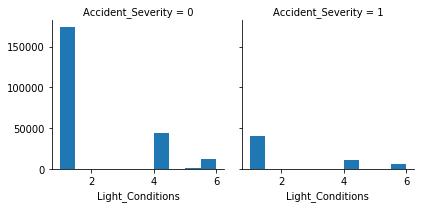

In [116]:
g = sns.FacetGrid(Data1, col='Accident_Severity')
g = g.map(plt.hist, "Light_Conditions")

Distribution of Accident according to the Day

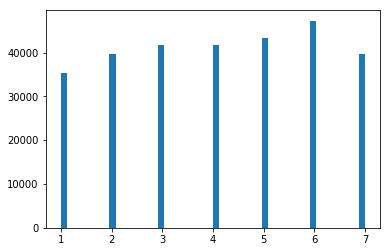

In [117]:
plt.hist(Data1['Day_of_Week'], bins='auto')  
plt.show()

Distribution of the accident according to the Severity of it during the day

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


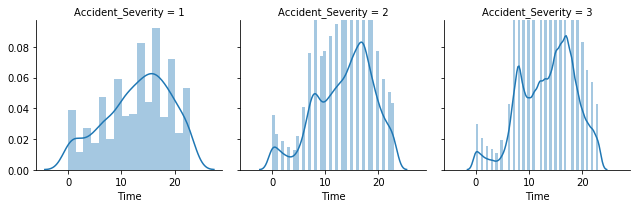

In [118]:
Accident5=Accident.copy()
Accident5['Time']=Accident5['Time'].str.split(":",expand=True)[0] 
Accident5['Time'] = Accident5['Time'].astype('float64') 
g = sns.FacetGrid(Accident5, col='Accident_Severity')
g = g.map(sns.distplot, "Time")

Distribution of the accident during the day of the week and the moment of the day

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


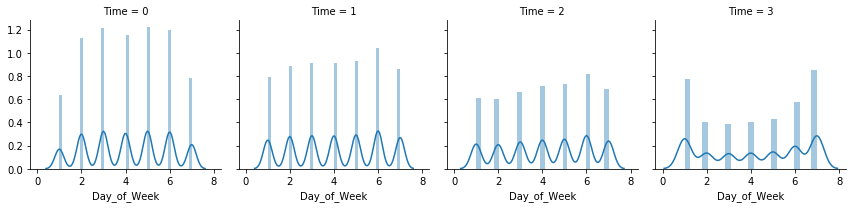

In [119]:
g = sns.FacetGrid(Data1, col='Time')
g = g.map(sns.distplot, "Day_of_Week")

Distribution of the number of car involve in the accident 

(array([     0.,  37693., 180822.,  45931.,  15248.,   5116.,   1848.,
           943.,    611.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

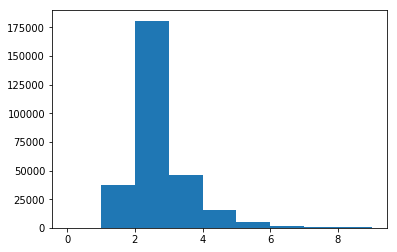

In [120]:
plt.hist(Data1['Number_of_Vehicles'], bins=range(0,10))  

Gravity of the accident according the Surface condition of the road

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


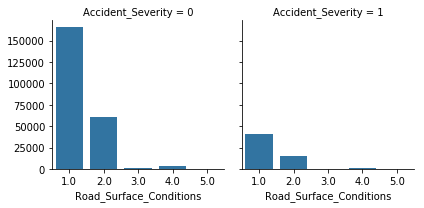

In [121]:
g= sns.FacetGrid(Data1,col='Accident_Severity')
g=g.map(sns.countplot,'Road_Surface_Conditions')

Severity of the accident according the weather

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


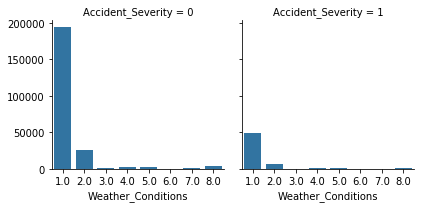

In [122]:
g= sns.FacetGrid(Data1,col='Accident_Severity')
g=g.map(sns.countplot,'Weather_Conditions')

Distribution of the accident according to the age of the driver

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


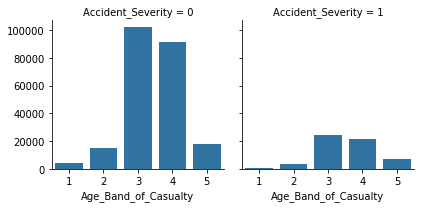

In [123]:
g= sns.FacetGrid(Data1,col='Accident_Severity')
g=g.map(sns.countplot,'Age_Band_of_Casualty')

# RIDGE

In [124]:
X = Data2
Y = Data2["Accident_Severity"]
X = X.drop("Accident_Severity", axis=1)

In [125]:
X.head()

,Longitude,Latitude,Number_of_Vehicles,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,...,Urban_or_Rural_Area,Month,Casualty_Class,Age_Band_of_Casualty,Vehicle_Type,Vehicle_Manoeuvre,1st_Point_of_Impact,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC)
0,-0.080107,51.650061,2,7,3,3,6.0,30,0.0,0.0,...,1.0,08,2,3,1.0,18.0,1.0,1.0,3,1.0
1,-0.080107,51.650061,2,7,3,3,6.0,30,0.0,0.0,...,1.0,08,2,3,3.0,18.0,2.0,1.0,3,1.0
2,-0.080107,51.650061,2,7,3,3,6.0,30,0.0,0.0,...,1.0,08,1,3,1.0,18.0,1.0,1.0,3,1.0
3,-0.080107,51.650061,2,7,3,3,6.0,30,0.0,0.0,...,1.0,08,1,3,3.0,18.0,2.0,1.0,3,1.0
4,-0.080107,51.650061,2,7,3,3,6.0,30,0.0,0.0,...,1.0,08,2,3,1.0,18.0,1.0,1.0,3,1.0


#### Ridge Regression

In [126]:
ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

# Function to print coef
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
    
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: -0.0 * X0 + 0.007 * X1 + 0.005 * X2 + -0.001 * X3 + 0.02 * X4 + 0.003 * X5 + 0.019 * X6 + 0.002 * X7 + -0.004 * X8 + 0.001 * X9 + 0.008 * X10 + -0.0 * X11 + -0.014 * X12 + 0.049 * X13 + 0.001 * X14 + 0.04 * X15 + 0.021 * X16 + 0.021 * X17 + 0.005 * X18 + -0.007 * X19 + -0.033 * X20 + 0.012 * X21 + 0.013 * X22


Then we drop the useless columns according to the coefficient that we found with the Ridge Regression.

In [127]:
Data2.drop(['Longitude','Latitude','Number_of_Vehicles','Time','Road_Type','Speed_limit','Junction_Detail','Junction_Control','Light_Conditions','Vehicle_Type','Vehicle_Manoeuvre','Age_Band_of_Driver'], inplace = True, axis=1)


#  SPLIT TRAIN / VALIDATION / TEST

In [128]:
train, validate, test = np.split(Data2, [int(.6*len(Data2)), int(.8*len(Data2))])

In [129]:
train.shape,validate.shape,test.shape

((173181, 12), (57727, 12), (57727, 12))

In [130]:
X_train = train
Y_train = train["Accident_Severity"]
X_train = X_train.drop("Accident_Severity", axis=1)

In [131]:
X_validation = validate
Y_validation = validate["Accident_Severity"]
X_validation = validate.drop("Accident_Severity", axis=1)

In [132]:
X_test = test
Y_test = test["Accident_Severity"]
X_test = test.drop("Accident_Severity", axis=1)

In [133]:
X_train.shape, Y_train.shape, X_validation.shape, Y_validation.shape, X_test.shape, Y_test.shape

((173181, 11), (173181,), (57727, 11), (57727,), (57727, 11), (57727,))

# MODEL on Validation Set

In [134]:
## Logistic Regression ##
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_validation)
acc_logreg = round(accuracy_score(Y_pred, Y_validation) * 100, 2)
print(acc_logreg)

79.61


In [135]:
## KNN ##
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_validation)
acc_knn = round(accuracy_score(Y_pred, Y_validation) * 100, 2)
acc_knn

74.71

In [136]:
## DECISION TREE ##
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_validation)
acc_decision_tree = round(accuracy_score(Y_pred, Y_validation) * 100, 2)
acc_decision_tree

72.88

In [137]:
## RANDOM FOREST ##
randomforest = RandomForestClassifier()
randomforest.fit(X_train, Y_train)
Y_pred = randomforest.predict(X_validation)
acc_randomforest = round(accuracy_score(Y_pred, Y_validation) * 100, 2)
print(acc_randomforest)

74.47


In [138]:
## GRADIENT BOOSTING CLASSIFIER ##
gbk = GradientBoostingClassifier()
gbk.fit(X_train, Y_train)
Y_pred = gbk.predict(X_validation)
acc_gbk = round(accuracy_score(Y_pred, Y_validation) * 100, 2)
print(acc_gbk)

79.61


In [139]:
# Summary of models with accuracies
models = pd.DataFrame({
    'Model': [ 'KNN', 'Regression', 'Decision Tree','Random Forest','Gradient Boosting'],
    'Score': [ acc_knn, acc_logreg, acc_decision_tree, acc_randomforest, acc_gbk]})
models.sort_values(by='Score', ascending=False)
#'SVM',acc_svm,

,Model,Score
1,Regression,79.61
4,Gradient Boosting,79.61
0,KNN,74.71
3,Random Forest,74.47
2,Decision Tree,72.88


In [140]:
Y_test.shape,Y_validation.shape

((57727,), (57727,))

# MODEL on Test Set

In [141]:
## Logistic Regression ##
Y_predfinal = logreg.predict(X_test)
acc_logreg_test = round(accuracy_score(Y_predfinal, Y_test) * 100, 2)
acc_logreg_test

78.15

In [142]:
## KNN ##
Y_predfinal = knn.predict(X_test)
acc_knn_test = round(accuracy_score(Y_predfinal, Y_test) * 100, 2)
acc_knn_test

73.95

In [143]:
## DECISION TREE ##
Y_predfinal = decision_tree.predict(X_test)
acc_decision_tree_test = round(accuracy_score(Y_predfinal, Y_test) * 100, 2)
acc_decision_tree_test

71.78

In [144]:
## RANDOM FOREST ##
Y_predfinal = randomforest.predict(X_test)
acc_randomforest_test = round(accuracy_score(Y_predfinal, Y_test) * 100, 2)
acc_randomforest_test

73.34

In [145]:
## GRADIENT BOOSTING CLASSIFIER ##
Y_predfinal = gbk.predict(X_test)
acc_gbk_test = round(accuracy_score(Y_predfinal, Y_test) * 100, 2)
acc_gbk_test

78.22

In [146]:
# Summary of models with accuracies
models = pd.DataFrame({
    'Model': [ 'KNN', 'Regression', 'Decision Tree','Random Forest','Gradient Boosting'],
    'Validation': [ acc_knn, acc_logreg, acc_decision_tree, acc_randomforest, acc_gbk],
    'Test': [ acc_knn_test, acc_logreg_test, acc_decision_tree_test, acc_randomforest_test, acc_gbk_test]})
models.sort_values(by='Test', ascending=False)
#'SVM', acc_svm,acc_svm_test,

,Model,Validation,Test
4,Gradient Boosting,79.61,78.22
1,Regression,79.61,78.15
0,KNN,74.71,73.95
3,Random Forest,74.47,73.34
2,Decision Tree,72.88,71.78


#### The best model is the Gradient Boosting

We use the Gradient Boosting model to compute the area under the curve and the confusion matrix : 

In [147]:
Y_predfinal = gbk.predict(X_test)
acc_gbk_test = round(accuracy_score(Y_predfinal, Y_test) * 100, 2)
acc_gbk_test

78.22

Calculate the area under the curve for the Y_predfinal with the Gradient Boosting

In [148]:
roc_auc_score(Y_test,Y_predfinal)

0.5055191818528977

Confusion Matrix 

In [149]:
confusion_matrix(Y_test,Y_predfinal)

array([[44977,   135],
       [12438,   177]])

Roc Curve for the Y_predfinal with the Gradient Boosting

No handles with labels found to put in legend.


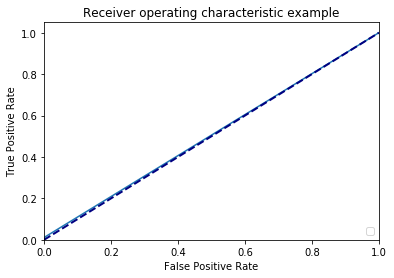

0.5055191818528977

In [150]:
roc_auc_score(Y_test,Y_predfinal)

fpr, tpr, _ = roc_curve(Y_test[:], Y_predfinal[:])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
roc_auc_score(Y_test,Y_predfinal)